## Car Price Prediction

## The problem at hand is to model the 'Selling Price' of used cars based on the features given in the datasets.

## ML - Regression Problem

<center><img src="umdi.png" ...></center>


## Group 2 - MEI - DI - UMINHO - 2021/22 



<center><img src="used_cars2.jpg" ...></center>

# About the data
# car_data.csv

Model: Model name of the car that is sold.

Selling Price: The selling price of the car. This is our target feature.

Kilometers Driven: Number of kilometers that the car has already driven.

Year: Year of purchase of the car.

Owner: Information on a number of the previous owners.

Fuel Type: Fuel type of car.

Transmission: Transmission type of car.

Insurance: Insurance information of the car.

Car Condition: Current car condition. A rating out of 5.


# model_data.csv

Model: Model name of the car that is sold.

Current Price: Current price of the car.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_data = pd.read_csv('car_data.csv')
model_data = pd.read_csv('model_data.csv')

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling Price      2237 non-null   int64  
 2   Kilometers Driven  2237 non-null   int64  
 3   Year               2237 non-null   int64  
 4   Owner              2237 non-null   object 
 5   Fuel Type          2237 non-null   object 
 6   Transmission       2237 non-null   object 
 7   Insurance          2223 non-null   object 
 8   Car Condition      2237 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 157.4+ KB


In [4]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          434 non-null    object
 1   Current Price  433 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


In [5]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [6]:
model_data.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


In [7]:
len(car_data['Model'].unique())

434

In [8]:
len(model_data['Model'].unique())

434

In [9]:
model_data['Model'].duplicated().any()

False

Since our datasets match, and there is no duplicated values in our model_data dataset we can performe an inner-join in our data.
We will add the atribute 'Current Price' from our ´model_data´ dataset to our ´car_data´ dataset using the 'Model' atribute as a way to performe the inner-join.

In [10]:
car_data = pd.merge(car_data, model_data ,on='Model')

In [11]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


In [12]:
car_data.describe()

,Selling Price,Kilometers Driven,Year,Car Condition
count,2.237000e+03,2237.000000,2237.000000,2237.000000
mean,4.184431e+05,61928.605275,2013.763523,4.370854
std,2.280516e+05,42260.955917,2.874686,0.288990
min,7.529900e+04,913.000000,2006.000000,3.000000
25%,2.720990e+05,32137.000000,2012.000000,4.200000
50%,3.557990e+05,55430.000000,2014.000000,4.300000
75%,5.032990e+05,83427.000000,2016.000000,4.600000
max,1.952397e+06,855881.000000,2020.000000,5.000000


In [13]:
car_data['Kilometers Driven'].value_counts()

63798     2
18966     2
66476     2
65667     2
85362     2
         ..
46410     1
85321     1
144712    1
64839     1
83967     1
Name: Kilometers Driven, Length: 2221, dtype: int64

In [14]:
# Looking ate the unique values of categorical features
print(car_data['Model'].unique())
print(car_data['Owner'].unique())
print(car_data['Fuel Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Insurance'].unique())

['MarutiWagonR1.0LXI' 'ToyotaEtiosLiva' 'MarutiAlto800' 'MarutiSwift'
 'MarutiWagonR1.0' 'HyundaiElitei20ASTA1.2'
 'HyundaiGrandi10SPORTZ1.2KAPPA' 'HyundaiElitei20ASTA' 'MarutiCelerio'
 'MarutiSwiftDzireVXI1.2BS' 'MarutiDzire' 'HondaCivic1.8S'
 'MarutiAltoK10VXI' 'MarutiAlto800LXI' 'HyundaiVernaFLUIDIC1.6EX'
 'ToyotaEtiosCROSS1.4' 'HondaCitySVCVT' 'VolkswagenVentoHIGHLINE'
 'Hyundaii20MAGNAO' 'VolkswagenPoloGT' 'MahindraTUV300'
 'HondaAmaze1.5VCVT' 'TataNanoXT' 'RenaultKwid' 'MarutiAltoK10'
 'HyundaiElitei20SPORTZ' 'MarutiZenEstilo' 'MarutiCelerioZXI'
 'MarutiSwiftDzireVDIBS' 'MarutiBalenoALPHA1.2' 'MarutiSwiftVDI'
 'TataTiagoXT1.2' 'MahindraBoleroPower+' 'HyundaiElitei20MAGNA1.4'
 'MarutiSX4' 'MarutiBalenoDELTA1.2K12' 'MarutiSwiftVXI' 'HondaCityVMT'
 'MahindraXUV500W8' 'HyundaiVENUE1.4CRDIMT' 'Hyundaii20MAGNAO1.4'
 'FordEcosport1.5TITANIUMTI' 'Hyundaii10SPORTZ1.2' 'HondaBrio1.2VMTI'
 'MarutiErtigaZXISMARTHYBRID' 'HondaCityVXMT' 'MahindraScorpioS6'
 'HyundaiVENUE1.0LTurboGDISX(O)' 'Hon

In [15]:
car_data.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
Current Price         2
dtype: int64

Lets delete the 2 Current Price which are null. 

In [16]:
print("Shape of car_data before dropping Rows with NULL values in Current Price : ",car_data.shape)
car_data = car_data[car_data['Current Price'].notna()]
print("Shape of car_data after dropping Rows with NULL values in Current Price : ",car_data.shape)

#car_data['Insurance'] = car_data['Insurance'].fillna(0)
#print("Shape of car_data after changing Rows with NULL values in Insurance to 0: ",car_data.shape)


Shape of car_data before dropping Rows with NULL values in Current Price :  (2237, 10)
Shape of car_data after dropping Rows with NULL values in Current Price :  (2235, 10)


Checking if we have any null values left to treat:

In [17]:
car_data.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
Current Price         0
dtype: int64

Now we need to fix the absent indexes brought upon by using the .notna() (e.g. if the row number 69 was dropped then the row after number 68 would have the index 70):

In [18]:
print(car_data.shape)
car_data = car_data.reset_index(drop=True)
print(car_data.shape)

(2235, 10)
(2235, 10)


Let's inspect to see if we can find some sort of relation between 'Kilometeres Driven' and 'Selling Price':

<AxesSubplot:xlabel='Kilometers Driven', ylabel='Selling Price'>

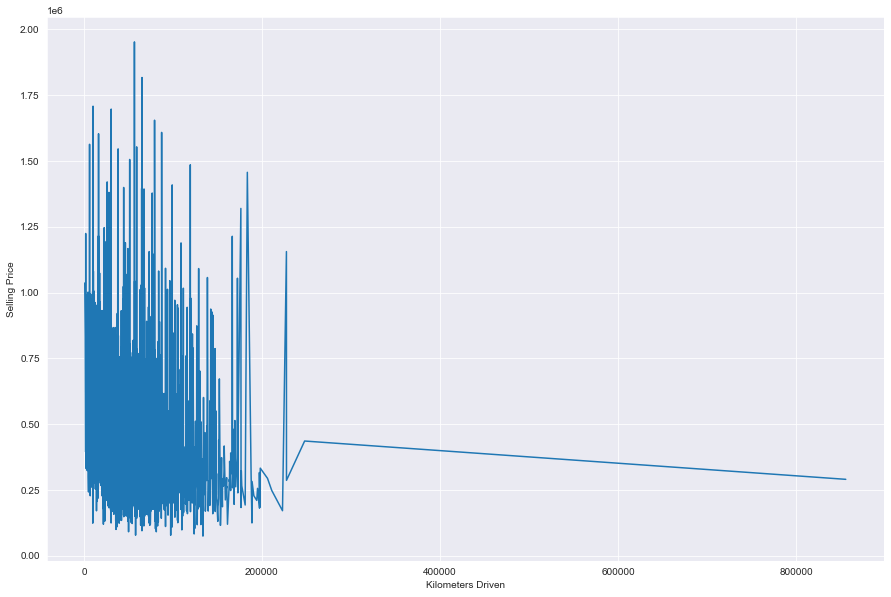

In [19]:
palette_lp = sns.color_palette("mako_r", 6)
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
sns.lineplot(data = car_data, x = "Kilometers Driven", y = "Selling Price")

Lets try to correlate fuel type and price:

In [20]:
car_data['Fuel Type'].describe()

count       2235
unique         4
top       Petrol
freq        1382
Name: Fuel Type, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

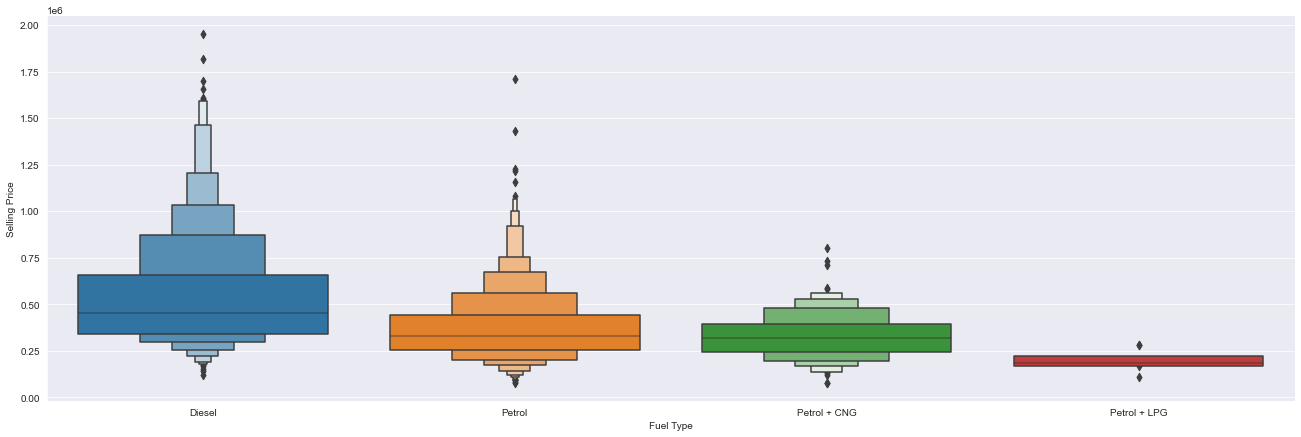

In [21]:
sns.catplot(y='Selling Price',x='Fuel Type',data= car_data.sort_values('Selling Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<AxesSubplot:xlabel='Year', ylabel='Selling Price'>

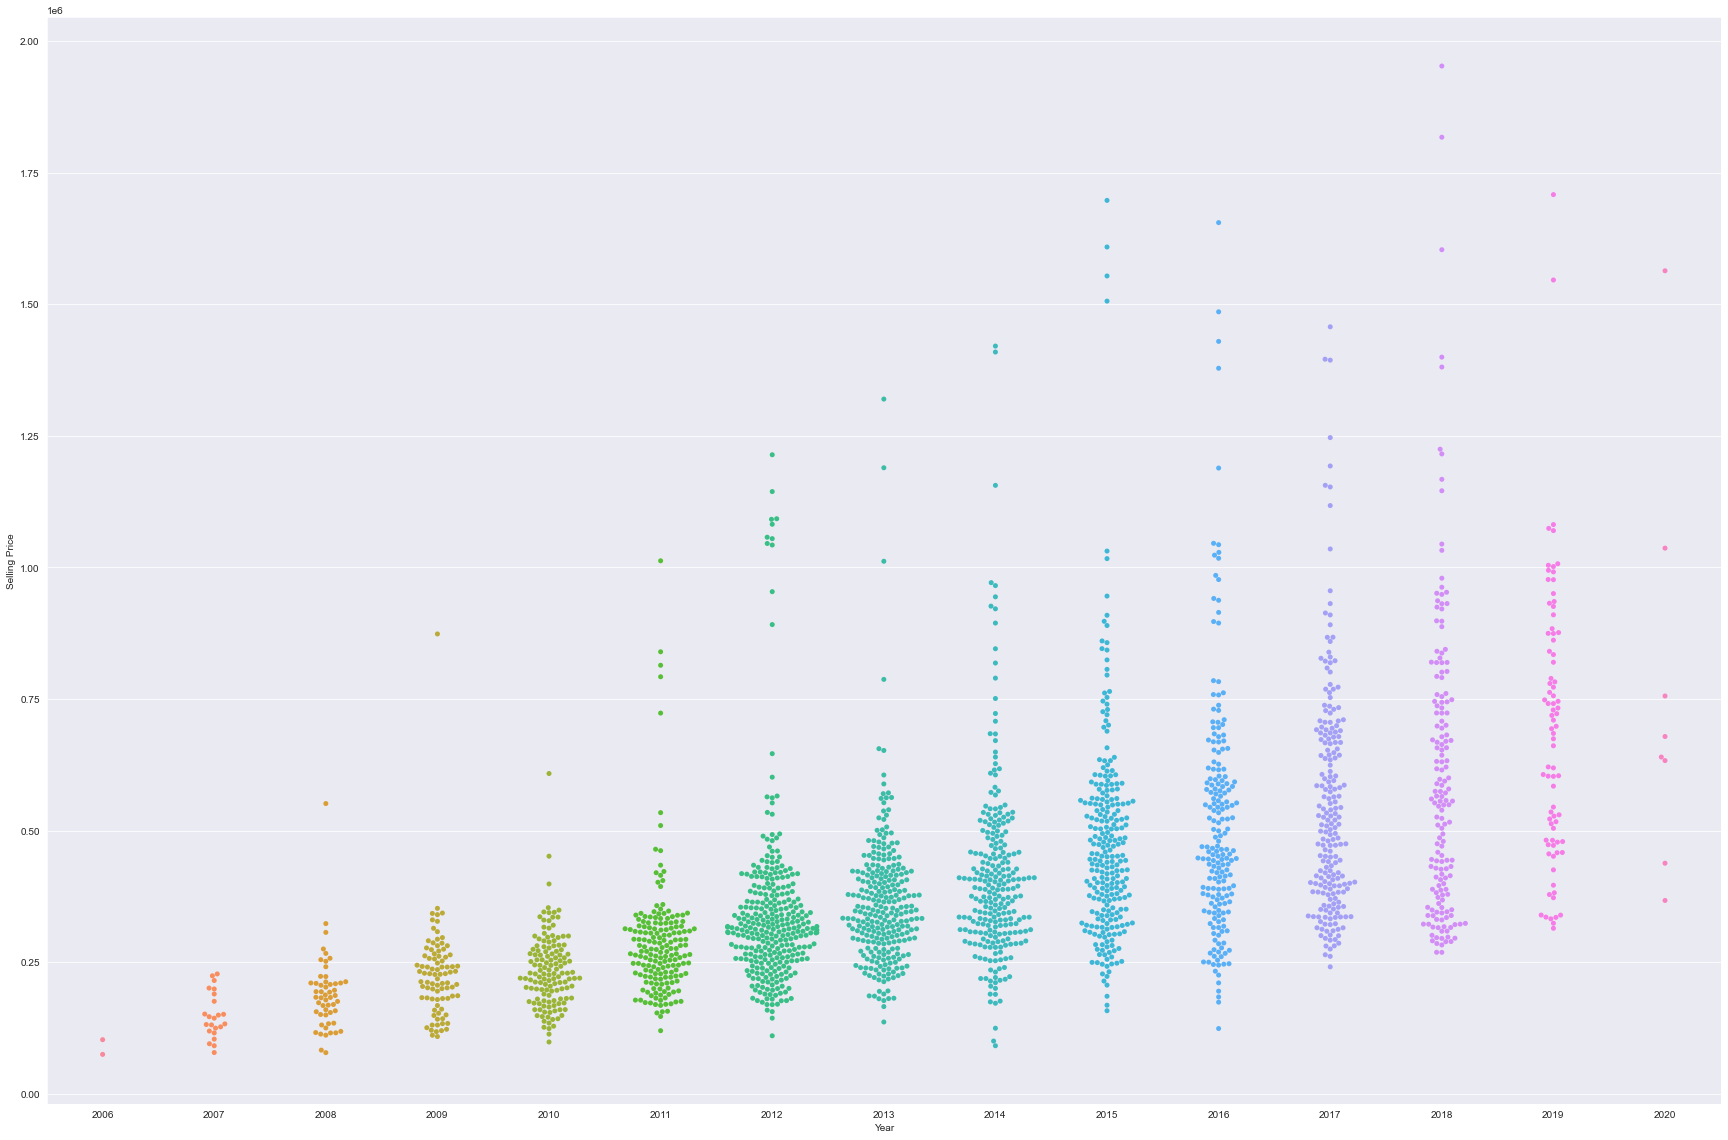

In [22]:
fig, _ = plt.subplots()
fig.set_size_inches(30, 20)
sns.swarmplot(x = 'Year', y ='Selling Price', data = car_data)

We can clearly see that both 'Fuel Type' and 'Year' atributes strongly correlate with 'Selling Price'.

<AxesSubplot:xlabel='Owner', ylabel='Selling Price'>

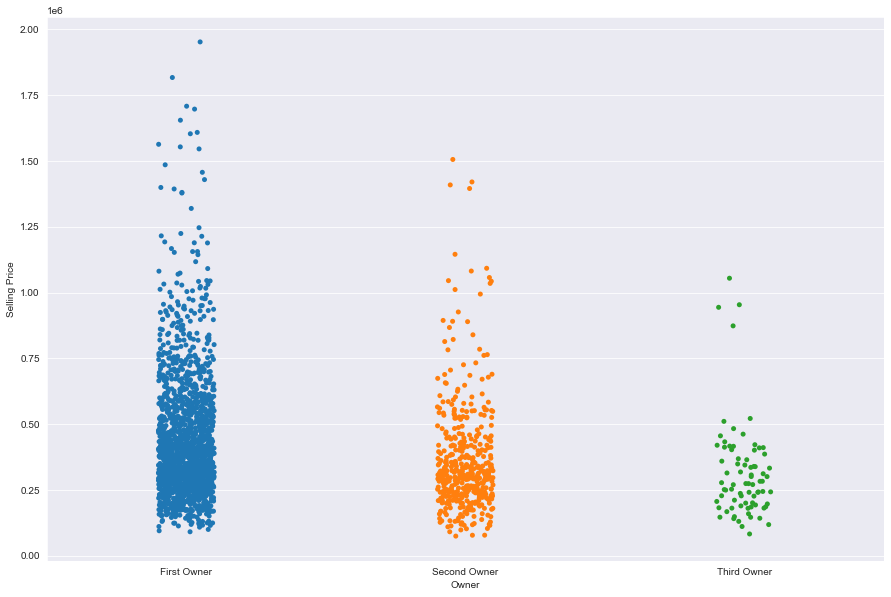

In [23]:
fig, _ = plt.subplots()
fig.set_size_inches(15, 10)
sns.stripplot(x = 'Owner', y ='Selling Price', data = car_data) 

Each time it changes 'Owner' the 'Selling Price' decreases further.

Now that we have visualized the dataset, we can start to treat it and prepare a final model to test.

In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2235 non-null   object 
 1   Selling Price      2235 non-null   int64  
 2   Kilometers Driven  2235 non-null   int64  
 3   Year               2235 non-null   int64  
 4   Owner              2235 non-null   object 
 5   Fuel Type          2235 non-null   object 
 6   Transmission       2235 non-null   object 
 7   Insurance          2221 non-null   object 
 8   Car Condition      2235 non-null   float64
 9   Current Price      2235 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 174.7+ KB


Let's use One-hot-encoding to treat fuel type:

In [25]:
Fuel_Type_f = car_data[['Fuel Type']]
Fuel_Type_f = pd.get_dummies(Fuel_Type_f,drop_first=True)
Fuel_Type_f.head()

,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


Let's treat the transmission as Automatic or Manual: 

In [26]:
Transmission_f = car_data['Transmission'].apply(lambda x: 'AUTOMATIC' if x=='AUTOMATIC' else 'MANUAL')
Transmission_f = pd.get_dummies(Transmission_f)

Transmission_f.head()

,AUTOMATIC,MANUAL
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


* 1- First Owner
* 2- Second Owner
* 3- Third Owner

In [27]:
car_data.replace(to_replace ="First Owner", value = 1, inplace = True)
car_data.replace(to_replace ="Second Owner", value = 2, inplace = True)
car_data.replace(to_replace ="Third Owner", value = 3, inplace = True)
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238,2014,1,Petrol + CNG,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514,2015,2,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735,2017,2,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709,2013,1,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691,2012,2,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


Now lets treat 'Insurance', where we will set the number of days left of insurance for a given model at the time of creation of this given dataset.

In [28]:
from datetime import datetime

startDate = '20-02-2021'
startDate = datetime.strptime(startDate, '%d-%m-%Y')

car_data['Insurance'] = car_data['Insurance'].fillna('Expired')

for i in car_data['Insurance'].unique():
    if (i == 'Expired' or i == 'Comp' or i == 'Third_party' or i == 'Zero_Dep' or i == 'Zero Depreciation' or i=='Insurance Expired' or i == 'Comprehensive' or i == '3rd Party'):
        car_data.replace(to_replace=i, value=0, inplace = True)
    else:
        date = datetime.strptime(i, '%d-%m-%Y')
        delta = startDate - date
        if(delta.days < 0):
            car_data.replace(to_replace=i, value=0, inplace = True)
        else:
            car_data.replace(to_replace=i, value=delta.days, inplace = True)
car_data['Insurance'].unique()

array([  0,  18,  24, 163, 135,  19,  36,   6,  15, 168,  81,  52, 384,
       272,   3,  37,   8,  21,  64,  50, 162,  71,   4,  13,   1,  49,
        31,  43,  28,  46,  94,  14, 242,  11,   2,  27,  17,  16,  95,
       153,  45,  42,  32,   5,  29,  44, 123,  33, 418,  41,  35,  48,
        99,  12,  73,  55,  22, 336,  88,  47,  30,   9,  62,  83, 104,
        40,  57,  25,  97, 111,  20, 350,  59,  53, 186,  66,  51,  10,
        26,  76, 132,  77,  34,  39,  74, 367,  75,  54,  65, 105, 227,
        78,  86,  84,  61,  69, 202, 143,   7,  38, 252, 199, 145, 215,
        92], dtype=int64)

Now lets convert the coin from Indian Rupees to American Dollars on the atribute 'Selling Price'

In [29]:
def convertToDolar(row):
    return row * 0.01332

car_data['Selling Price'] = car_data['Selling Price'].apply(convertToDolar)

Now lets convert the coin from Indian Rupees to American Dollars on the atribute 'Current Price'

In [30]:
units = ['Lakh','Lakhs','Rs.',',']

def converToDolar2(row):
    if type(row) is str:
        mult = 1
        if units[0] in row or units[1] in row:
            mult = 100000
        for j in units:
            row = row.replace(j,'')
        return float(row) * mult * 0.01332
    elif type(row) is float:
        return row * 0.01332


car_data['Current Price'] = car_data['Current Price'].apply(converToDolar2)

Now let's fetch the car models name and add it as the atribute 'Company':

Analyzing the dataset we can conclude that from the atribute 'Model' capturing the first word until the next capitalized letter we can obtain the company of the model.

In [31]:
import re
car_data['Company'] = car_data['Model'].apply(lambda x: re.findall(r"[A-Z][^A-Z]*", x) [0])

In [32]:
car_data['Company'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Honda', 'Volkswagen', 'Hyundaii20',
       'Mahindra', 'Tata', 'Renault', 'Ford', 'Hyundaii10', 'Nissan',
       'Datsun', 'Chevrolet', 'Skoda', 'Audi', 'B', 'Fiat', 'Mercedes',
       'M', 'Ssangyong', 'Jeep'], dtype=object)

We can see that we need to capture the specific model's company where the main regex condition fails

In [33]:
car_data['Company']=car_data['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii20' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii10' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'BMW' if x is 'B' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'MGHECTORSHARPDCT' if x is 'M' else x)
car_data['Company'].unique()

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-33-f294cbba322c>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  car_data['Company']=car_data['Company'].apply(lambda x: 'BMW' if x is 'B' else x)
<ipython-input-33-f294cbba322c>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  car_data['Company']=car_data['Company'].apply(lambda x: 'MGHECTORSHARPDCT' if x is 'M' else x)


array(['Maruti', 'Toyota', 'Hyundai', 'Honda', 'Volkswagen', 'Mahindra',
       'Tata', 'Renault', 'Ford', 'Nissan', 'Datsun', 'Chevrolet',
       'Skoda', 'Audi', 'BMW', 'Fiat', 'Mercedes', 'MGHECTORSHARPDCT',
       'Ssangyong', 'Jeep'], dtype=object)

In [34]:
Company_f = car_data[['Company']]
Company_f = pd.get_dummies(Company_f,drop_first=True)
Company_f.head()

,Company_BMW,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Ford,Company_Honda,Company_Hyundai,Company_Jeep,Company_MGHECTORSHARPDCT,Company_Mahindra,Company_Maruti,Company_Mercedes,Company_Nissan,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Company
0,MarutiWagonR1.0LXI,4158.03780,82238,2014,1,Petrol + CNG,MANUAL,0,4.2,6193.8,Maruti
1,MarutiWagonR1.0LXI,3230.08668,88514,2015,2,Petrol + CNG,MANUAL,0,4.4,6193.8,Maruti
2,MarutiWagonR1.0LXI,5084.23068,29735,2017,2,Petrol + CNG,MANUAL,0,4.3,6193.8,Maruti
3,MarutiWagonR1.0LXI,2424.22668,153709,2013,1,Petrol + CNG,MANUAL,0,4.1,6193.8,Maruti
4,MarutiWagonR1.0LXI,3190.12668,88691,2012,2,Petrol + CNG,MANUAL,0,4.4,6193.8,Maruti


Now let's gather all the atributes that we will use onto a single dataset:

In [36]:
car_data_f = pd.concat([car_data[['Selling Price','Kilometers Driven','Year','Owner','Insurance','Car Condition','Current Price']], Fuel_Type_f, Company_f ,Transmission_f], axis=1, sort=False)

Now let's deal with outliers:

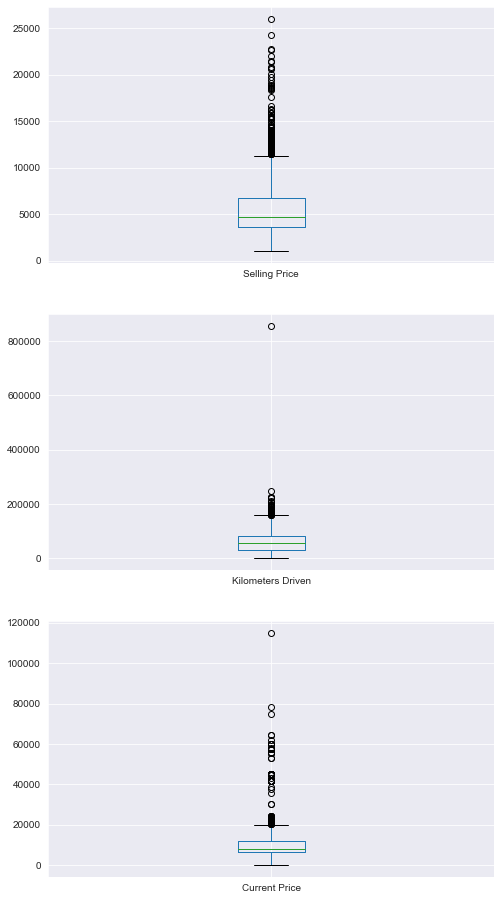

In [37]:
fig, axs = plt.subplots(3)

car_data_f.boxplot(column='Selling Price', ax=axs[0])
car_data_f.boxplot(column='Kilometers Driven', ax=axs[1])
car_data_f.boxplot(column='Current Price', ax=axs[2])

fig.set_size_inches(8, 16)
plt.show()

In [38]:
#REMOVER OUTLIERS 
from scipy.stats.mstats import winsorize
#tmp=car_data_f

#tmp['Current Price']=winsorize(car_data_f['Current Price'],(0,0.001))

car_data_f['Selling Price']=winsorize(car_data_f['Selling Price'],(0,0.03))
car_data_f['Kilometers Driven']=winsorize(car_data_f['Kilometers Driven'],(0,0.001))
car_data_f['Current Price']=winsorize(car_data_f['Current Price'],(0,0.001))

#tmp.boxplot(column='Current Price')

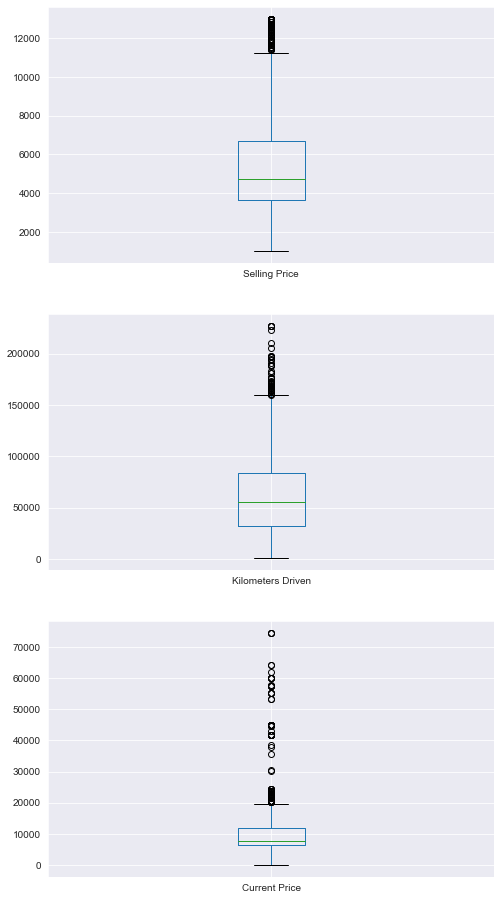

In [39]:
fig, axs = plt.subplots(3)

car_data_f.boxplot(column='Selling Price', ax=axs[0])
car_data_f.boxplot(column='Kilometers Driven', ax=axs[1])
car_data_f.boxplot(column='Current Price', ax=axs[2])

fig.set_size_inches(8, 16)
plt.show()

Correlation Matrix:

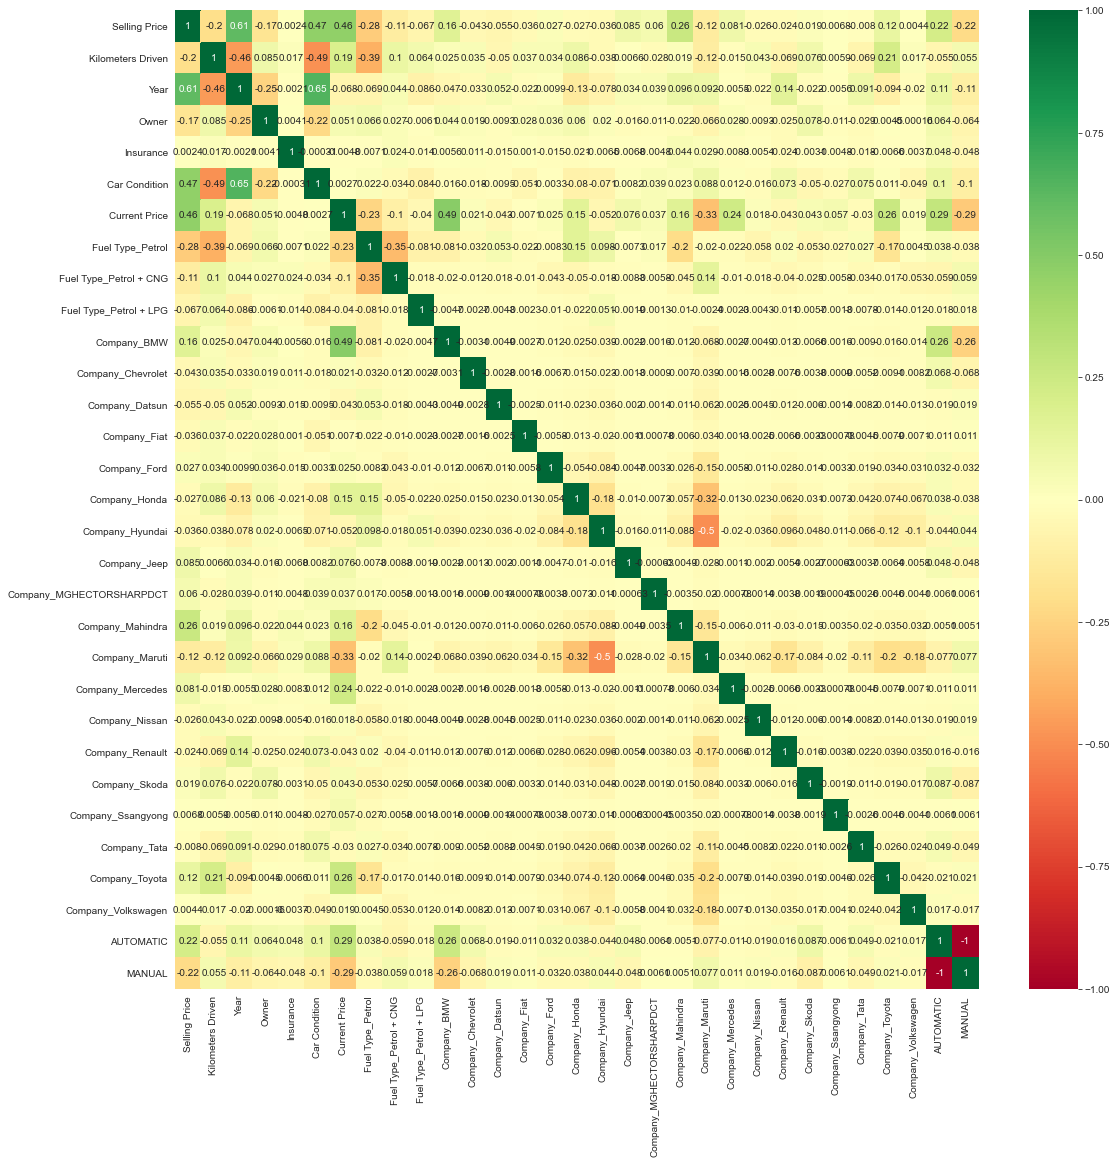

In [40]:
plt.figure(figsize=(18,18))
sns.heatmap(car_data_f.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [41]:
car_data_f.head()

,Selling Price,Kilometers Driven,Year,Owner,Insurance,Car Condition,Current Price,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,...,Company_Mercedes,Company_Nissan,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen,AUTOMATIC,MANUAL
0,4158.03780,82238,2014,1,0,4.2,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3230.08668,88514,2015,2,0,4.4,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5084.23068,29735,2017,2,0,4.3,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2424.22668,153709,2013,1,0,4.1,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3190.12668,88691,2012,2,0,4.4,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
car_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Selling Price             2235 non-null   float64
 1   Kilometers Driven         2235 non-null   int64  
 2   Year                      2235 non-null   int64  
 3   Owner                     2235 non-null   int64  
 4   Insurance                 2235 non-null   int64  
 5   Car Condition             2235 non-null   float64
 6   Current Price             2235 non-null   float64
 7   Fuel Type_Petrol          2235 non-null   uint8  
 8   Fuel Type_Petrol + CNG    2235 non-null   uint8  
 9   Fuel Type_Petrol + LPG    2235 non-null   uint8  
 10  Company_BMW               2235 non-null   uint8  
 11  Company_Chevrolet         2235 non-null   uint8  
 12  Company_Datsun            2235 non-null   uint8  
 13  Company_Fiat              2235 non-null   uint8  
 14  Company_

All our atributes are numerical and there are no null values.

Let's build the model, first we need to split the data into test and train.

In [43]:
X = car_data_f.drop('Selling Price', axis=1)
y = car_data_f[['Selling Price']]

In here we normalize the data. so we scale the values to have a value between 0 and 1 on all atributes.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]),columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]),columns=y.columns)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled , test_size = 0.2, random_state = 2021)

First lets try Linear Regression:

In [46]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.7066989987941852
Accuracy on Testing set:  0.7178342361070584


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, np.ravel(y_train))
y_pred= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,np.ravel(y_train)))
print("Accuracy on Testing set: ",rf_reg.score(X_test,np.ravel(y_test)))

Accuracy on Training set:  0.9812600130652778
Accuracy on Testing set:  0.887725967409294


In [48]:
# let's unscale the model to see real prices
y_pred_unscaled = scaler_y.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
# let's unscale y_test to get the original values
y_test_unscaled = scaler_y.inverse_transform(y_test)

In [49]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test_unscaled, y_pred_unscaled))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled)))
print('R Squared Error          : ', metrics.r2_score(y_test_unscaled, y_pred_unscaled))

		Error Table
Mean Absolute Error      :  703.3058126979865
Mean Squared  Error      :  851020.5542971616
Root Mean Squared  Error :  922.5077529740125
R Squared Error          :  0.8877259674092941


Now let's try using Grid Search:

In [50]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    #from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,3,4,5,6,8,12],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid
    #return [grid.best_score_ , grid.best_params_]
    #return grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    #print("R2 score: ", r2_score(y_test,y_predict))
    return y_predict


In [51]:
gridOut = Grid_Search_CV_RFR(X_train,np.ravel(y_train))
gridOut

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 12],
                         'n_estimators': [100, 200, 300]})

In [52]:
#np.ravel to return a contiguous flattened array, 1-D array or else we get conversion warnings.

y_predict_GS = RFR(X_train, X_test, np.ravel(y_train), y_test, gridOut.best_params_)


In [53]:
print("Accuracy on Training set: ",gridOut.score(X_train,y_train))
print("Accuracy on Testing set: ",gridOut.score(X_test,y_test))

Accuracy on Training set:  0.9789841437056459
Accuracy on Testing set:  0.8854920848019491


In [54]:
#restoring data to the real values
y_predict_GS = y_predict_GS.reshape(y_predict_GS.shape[0], 1)
y_predict_GS_unscaled = scaler_y.inverse_transform(y_predict_GS)
y_test_unscaled = scaler_y.inverse_transform(y_test)

In [55]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test_unscaled, y_predict_GS_unscaled))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test_unscaled, y_predict_GS_unscaled))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_predict_GS_unscaled)))
print('R Squared Error          : ', metrics.r2_score(y_test_unscaled, y_predict_GS_unscaled))

		Error Table
Mean Absolute Error      :  701.8690248266049
Mean Squared  Error      :  854237.771011079
Root Mean Squared  Error :  924.2498423105513
R Squared Error          :  0.8873015242012354


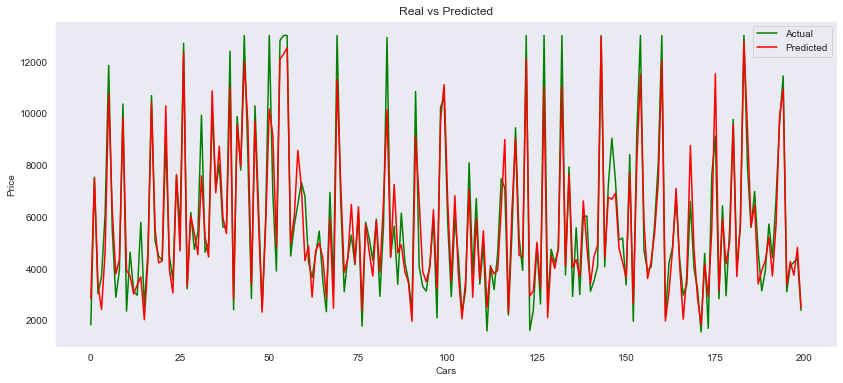

In [56]:
# Visualising the actual and predicted result
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color = 'green', label = 'Actual')
    plt.plot(y_predict_GS_unscaled[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha = 0.3)
    plt.xlabel('Cars')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

# Let's limit to 200 comparisons for better visualization
real_predicted_viz(200)

Let's try using an Artificial Neural Network

In [57]:
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("TensorFlow version:", tf.__version__)
len(X_train.columns)

TensorFlow version: 2.3.0


30

In [58]:
#Learning rate parametro importante
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(45, input_dim=30, activation=activation))
    model.add(Dense(25, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='relu'))
    
    #Define as funções que calculam o erro
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model

Tuning the model's hyperparamters:

In [59]:
TUNING_DICT = {'learning_rate':[0.1,0.01,0.001]}

In [60]:
kf = KFold(n_splits = 10, shuffle=True, random_state=RANDOM_SEED)

#Epochs e batch_sizer hyperparametros
model = KerasRegressor(build_fn=build_model, epochs=1000, batch_size=10)
grid_search = GridSearchCV(estimator = model,
                          param_grid = TUNING_DICT,
                          cv = kf,
                          scoring = 'neg_mean_absolute_error',
                          refit = 'True',
                          verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2, verbose=0)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021793F58D60>,
             param_grid={'learning_rate': [0.1, 0.01, 0.001]}, refit='True',
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.070404 using {'learning_rate': 0.01}
-0.290992 (0.095532) with: {'learning_rate': 0.1}
-0.070404 (0.008350) with: {'learning_rate': 0.01}
-0.070784 (0.003940) with: {'learning_rate': 0.001}


In [62]:
best_mlp_model = grid_search.best_estimator_

Overfitting Analysis

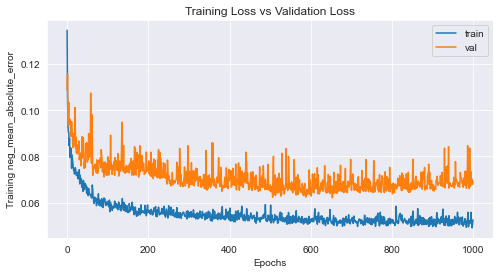

In [63]:
def plot_learning_curve(history, metric='neg_mean_absolute_error'):
    plt.figure(figsize=(8,4))
    plt.title("Training Loss vs Validation Loss")
    plt.plot(history.epoch, history.history['loss'], label = 'train')
    plt.plot(history.epoch, history.history['val_loss'], label = 'val')
    plt.ylabel("Training " + metric)
    plt.xlabel('Epochs')
    plt.legend()

plot_learning_curve(best_mlp_model.model.history, metric='neg_mean_absolute_error')

MLP predictions:

In [64]:
predictions = best_mlp_model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0],1)
predictions[:5]

array([[0.16207722],
       [0.49625877],
       [0.15823922],
       [0.09042001],
       [0.22442912]], dtype=float32)

MLP predictions unscaled:

In [65]:
predictions_unscaled = scaler_y.inverse_transform(predictions)
predictions_unscaled[:5]

array([[2949.8503],
       [6964.0312],
       [2903.7483],
       [2089.1055],
       [3698.8198]], dtype=float32)

In [66]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:5]

array([[1822.16268],
       [7533.77868],
       [3024.95868],
       [3696.28668],
       [6077.90268]])

Other metrics:

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_unscaled,predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled,predictions_unscaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_unscaled,predictions_unscaled)))

MAE: 899.8989143699315
MSE: 1758492.9193373937
RMSE: 1326.0817920993386


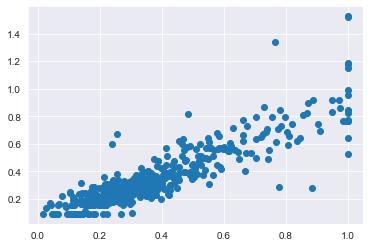

In [68]:
plt.scatter(y_test,predictions)

Comparison between real and predicted values:

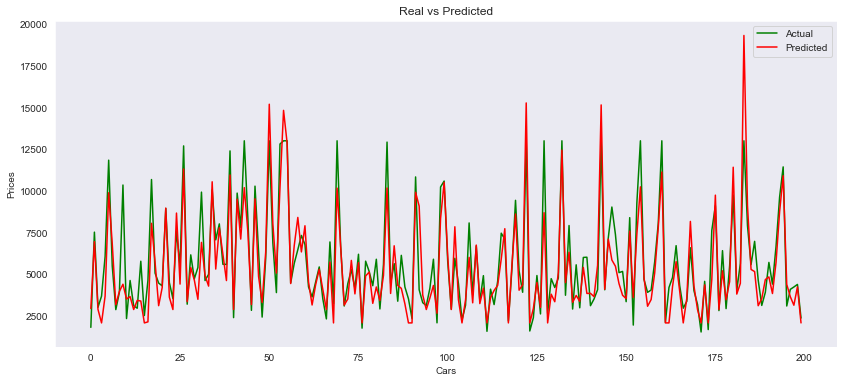

In [69]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color = 'green', label = 'Actual')
    plt.plot(predictions_unscaled[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha = 0.3)
    plt.xlabel('Cars')
    plt.ylabel('Prices')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()
    
real_predicted_viz(200)